# Standardkram

In [1]:
import pandas as pd

# Load the dataset
train = pd.read_csv("../data/train.csv")

In [2]:
def transform_data(df:pd.DataFrame):
    # Now the names...
    # First, seperate the first and last name
    df[["LastName", "FirstName_tmp"]] = df["Name"].str.split(",", expand=True)
    
    # Now the salutation forms
    df[["SalutForm","FirstName"]] = df["FirstName_tmp"].str.split(".", n=1, expand=True)
    
    df = df.drop([
        "PassengerId",
        "FirstName_tmp",
        "FirstName",
        "LastName",
        "Name",
        "Cabin",
        "Ticket"],
        axis=1)
    return df

In [3]:
train = transform_data(train)

In [4]:
from sklearn.utils import resample

resample(train, replace=True, random_state=1234)



,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,SalutForm
815,0,1,male,NaN,0,0,0.0000,S,Mr
723,0,2,male,50.0,0,0,13.0000,S,Mr
294,0,3,male,24.0,0,0,7.8958,S,Mr
53,1,2,female,29.0,1,0,26.0000,S,Mrs
204,1,3,male,18.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
737,1,1,male,35.0,0,0,512.3292,C,Mr
314,0,2,male,43.0,1,1,26.2500,S,Mr
126,0,3,male,NaN,0,0,7.7500,Q,Mr
419,0,3,female,10.0,0,2,24.1500,S,Miss


In [5]:
# Split the data
from sklearn.model_selection import train_test_split

y = train["Survived"]
X = train.drop(["Survived"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
num_cols = ["Age", "SibSp", "Parch", "Fare"]
cat_cols = ["Pclass", "Sex", "Embarked", "SalutForm"]

In [7]:
# Define pipelines and preprocessor
from sklearn import (compose, impute, linear_model, preprocessing)
from sklearn.pipeline import Pipeline

numerical_preprocessor = Pipeline(steps=[
    ("imputer", impute.SimpleImputer(strategy="mean")),
    ("scaler", preprocessing.StandardScaler())
])

categorical_preprocessor = Pipeline(steps=[
    ("imputer", impute.SimpleImputer(strategy="most_frequent")),
    ("onehot", preprocessing.OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = compose.ColumnTransformer(
    transformers=[
        ("numerical", numerical_preprocessor, num_cols),
        ("categorical", categorical_preprocessor, cat_cols)
    ]
)

In [8]:
# Model Definition
from sklearn.linear_model import LogisticRegression

algo = LogisticRegression()

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("model", algo)
])

model = pipeline.fit(X_train, y_train)

In [9]:
def threshold_predict(model, X, threshold=0):
    y_predict = model.decision_function(X)
    y_alt_threshold_predict = (y_predict > threshold)
    return y_alt_threshold_predict.astype(int)
    

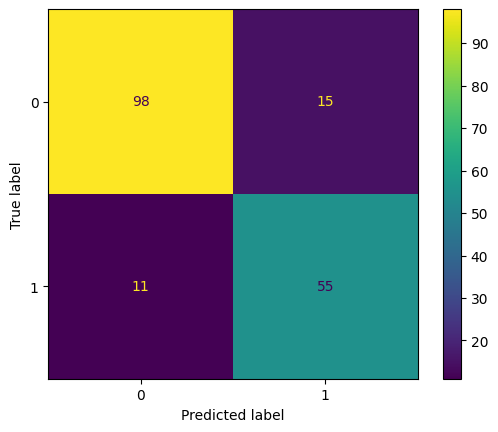

In [15]:
# Konfusionsmatrix und recall sowie precision
 

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

threshold = 0
y_test_predict = threshold_predict(model, X_test, threshold=threshold)
cm = confusion_matrix(y_test, y_test_predict)


cm_display = ConfusionMatrixDisplay(cm).plot()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f"Accuracy: \t{accuracy_score(y_test, y_test_predict)}")
print(f"Precision: \t{precision_score(y_test, y_test_predict)}")
print(f"Recall: \t{recall_score(y_test, y_test_predict)}")
print(f"F1 Score: \t{f1_score(y_test, y_test_predict)}")

Accuracy: 	0.8547486033519553
Precision: 	0.7857142857142857
Recall: 	0.8333333333333334
F1 Score: 	0.8088235294117647


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calc_metrics(y, y_predicts):
    return [
        accuracy_score(y, y_predicts),
        precision_score(y, y_predicts),
        recall_score(y, y_predicts),
        f1_score(y, y_predicts)        
    ]

In [13]:
for i in range(-10, 11, 1):
    threshold = i/10
    print(f"Threshold: \t{threshold}")
    y_predicts = threshold_predict(model, X_test, threshold)
    metrics = calc_metrics(y_test, y_predicts)
    print(f"Accuracy: \t{metrics[0]}")
    print(f"Precision: \t{metrics[1]}")
    print(f"Recall: \t{metrics[2]}")
    print(f"F1 Score: \t{metrics[3]}")
    print("\n")

Threshold: 	-1.0
Accuracy: 	0.770949720670391
Precision: 	0.6404494382022472
Recall: 	0.8636363636363636
F1 Score: 	0.7354838709677419


Threshold: 	-0.9
Accuracy: 	0.7877094972067039
Precision: 	0.6627906976744186
Recall: 	0.8636363636363636
F1 Score: 	0.75


Threshold: 	-0.8
Accuracy: 	0.7932960893854749
Precision: 	0.6705882352941176
Recall: 	0.8636363636363636
F1 Score: 	0.7549668874172185


Threshold: 	-0.7
Accuracy: 	0.8044692737430168
Precision: 	0.6867469879518072
Recall: 	0.8636363636363636
F1 Score: 	0.7651006711409396


Threshold: 	-0.6
Accuracy: 	0.8156424581005587
Precision: 	0.7088607594936709
Recall: 	0.8484848484848485
F1 Score: 	0.7724137931034484


Threshold: 	-0.5
Accuracy: 	0.8212290502793296
Precision: 	0.717948717948718
Recall: 	0.8484848484848485
F1 Score: 	0.7777777777777778


Threshold: 	-0.4
Accuracy: 	0.8268156424581006
Precision: 	0.7272727272727273
Recall: 	0.8484848484848485
F1 Score: 	0.7832167832167832


Threshold: 	-0.3
Accuracy: 	0.8324022346368715
Pre

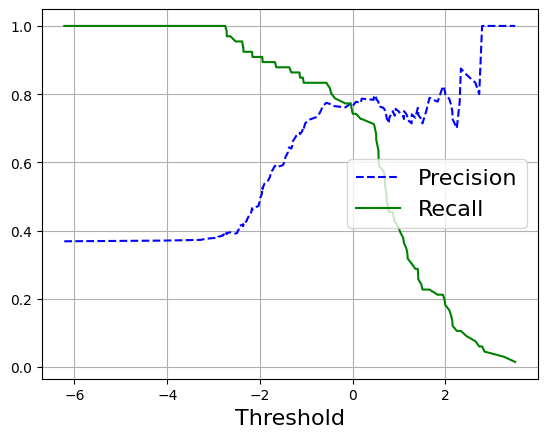

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

y_scores = cross_val_predict(model, X_test, y_test, cv=3,method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()